# Proyecto Final 
Presentado por:

Karin Elizabeth Lopez Padilla

Jose Andres Marquez Morataya

Se ha desarrollado un modelo de prediccion de el movimiento porcentual del precio de BTC en periodo de tiempo de 1 minuto, dicho modelo es para poder conocer si se puede o no invertir en btc con trading algoritmico o de alta velocidad.

Importamos las librerias necesarias para el proyecto

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:.8f}'.format

In [3]:
data = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [4]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39000000,4.39000000,4.39000000,4.39000000,0.45558087,2.00000002,4.39000000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def getNanColNames(df):
    colnames = df.columns
    cols_con_na = []
    for col in colnames:
        if(df[col].isnull().sum() > 0):
            cols_con_na.append(col)
    return cols_con_na

In [6]:
cols_con_nan = getNanColNames(data)
cols_con_nan

['Open',
 'High',
 'Low',
 'Close',
 'Volume_(BTC)',
 'Volume_(Currency)',
 'Weighted_Price']

In [7]:
data[cols_con_nan].isnull().mean()

Open                0.25602460
High                0.25602460
Low                 0.25602460
Close               0.25602460
Volume_(BTC)        0.25602460
Volume_(Currency)   0.25602460
Weighted_Price      0.25602460
dtype: float64

In [8]:
data[cols_con_nan].dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [9]:
data["Movimiento"] = data["Close"] - data["Open"]
data["Movimientoporcentaje"] = data["Movimiento"]/data["Open"]

In [10]:
data = data.dropna()

In [11]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Movimiento,Movimientoporcentaje
0,1325317920,4.39000000,4.39000000,4.39000000,4.39000000,0.45558087,2.00000002,4.39000000,0.00000000,0.00000000
478,1325346600,4.39000000,4.39000000,4.39000000,4.39000000,48.00000000,210.72000000,4.39000000,0.00000000,0.00000000
547,1325350740,4.50000000,4.57000000,4.50000000,4.57000000,37.86229723,171.38033753,4.52641150,0.07000000,0.01555556
548,1325350800,4.58000000,4.58000000,4.58000000,4.58000000,9.00000000,41.22000000,4.58000000,0.00000000,0.00000000
1224,1325391360,4.58000000,4.58000000,4.58000000,4.58000000,1.50200000,6.87916000,4.58000000,0.00000000,0.00000000


In [12]:
data.rename(columns = {'Volume_(BTC)':'Volume_BTC', 'Volume_(Currency)':'Volume_Currency'}, inplace = True)

In [13]:
data.Movimientoporcentaje.describe()

count   3613769.00000000
mean         -0.00000793
std           0.00204561
min          -0.99744376
25%          -0.00028961
50%           0.00000000
75%           0.00031485
max           0.41489804
Name: Movimientoporcentaje, dtype: float64

In [14]:
data.High.describe()

count   3613769.00000000
mean       6013.35708161
std        9003.52100638
min           3.80000000
25%         444.00000000
50%        3598.19000000
75%        8632.98000000
max       61781.83000000
Name: High, dtype: float64

In [15]:
data.Volume_Currency.describe()

count    3613769.00000000
mean       41762.84239708
std       151824.78390068
min            0.00000000
25%          452.14219543
50%         3810.12414310
75%        25698.21117600
max     13900672.40700000
Name: Volume_Currency, dtype: float64

In [16]:
data.Volume_BTC.describe()

count   3613769.00000000
mean          9.32324922
std          30.54989124
min           0.00000000
25%           0.40977594
50%           1.97981073
75%           7.27821636
max        5853.85216590
Name: Volume_BTC, dtype: float64

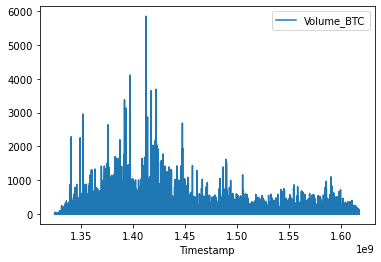

In [17]:
data.plot( 'Timestamp' , 'Volume_BTC',  ) 
plt.show()

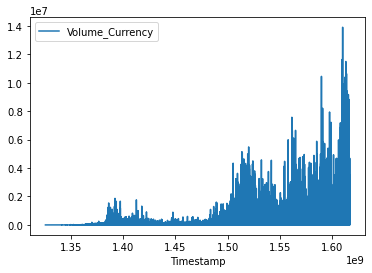

In [18]:
data.plot( 'Timestamp' , 'Volume_Currency',  ) 
plt.show()

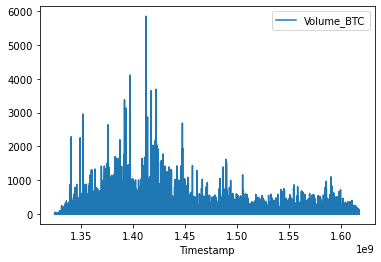

In [19]:
data.plot( 'Timestamp' , 'Volume_BTC',  ) 
plt.show()

# Ingenieria de caracteristicas

Tratamiento de outliers

<AxesSubplot:ylabel='Density'>

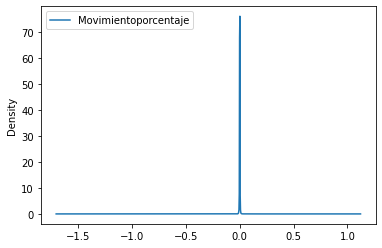

In [20]:
pd.DataFrame(data['Movimientoporcentaje']).plot(kind='density')

In [21]:
upper_limit = data['Movimientoporcentaje'].quantile(0.99)
lower_limit = data['Movimientoporcentaje'].quantile(0.01)

In [22]:
new_data = data[(data['Movimientoporcentaje'] <= upper_limit) & (data['Movimientoporcentaje'] >= lower_limit)]

<AxesSubplot:ylabel='Density'>

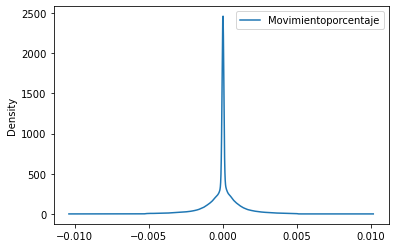

In [23]:
pd.DataFrame(new_data['Movimientoporcentaje']).plot(kind='density')

In [24]:
new_data = new_data[['Timestamp', 'Movimientoporcentaje']]
new_data

,Timestamp,Movimientoporcentaje
0,1325317920,0.00000000
478,1325346600,0.00000000
548,1325350800,0.00000000
1224,1325391360,0.00000000
1896,1325431680,0.00000000
...,...,...
4857372,1617148560,-0.00048217
4857373,1617148620,0.00003135
4857374,1617148680,0.00051812
4857375,1617148740,0.00031340


In [25]:
new_data.describe()

,Timestamp,Movimientoporcentaje
count,3541493.00000000,3541493.00000000
mean,1499257242.41633129,-0.00000444
std,73886592.51283853,0.00115629
min,1325317920.00000000,-0.00525495
25%,1436142000.00000000,-0.00026944
50%,1507169520.00000000,0.00000000
75%,1562988900.00000000,0.00029672
max,1617148800.00000000,0.00500881


Separamos los datos en 80/20 para generar la prediccion

In [26]:
dataset_final_Train = new_data.head(2833205)
dataset_final_Test = new_data.head(708301)

In [27]:
dataset_final_Train = dataset_final_Train.iloc[:, 1:2].values
dataset_final_Test = dataset_final_Test.iloc[:, 1:2].values

In [28]:
dataset_final_Train

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-0.0006474 ],
       [ 0.0002126 ],
       [ 0.00035072]])

In [29]:
dataset_final_Test

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.002599  ],
       [0.00175755],
       [0.00070234]])

In [33]:
X_train = []
Y_train = []
cantidad = dataset_final_Train.shape[0]
ventana = 2
for i in range(ventana, cantidad):
  X_train.append(dataset_final_Train[i - ventana: i, 0])
  Y_train.append(dataset_final_Train[i, 0])

In [34]:
X_train = np.array(X_train)
y_train = np.array(Y_train)

In [35]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [36]:
X_train

array([[[ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ]],

       ...,

       [[-0.00019586],
        [ 0.        ]],

       [[ 0.        ],
        [-0.0006474 ]],

       [[-0.0006474 ],
        [ 0.0002126 ]]])

In [37]:
X_train.shape

(2833203, 2, 1)

In [38]:
forecaster = Sequential()

forecaster.add(LSTM(input_shape=(X_train.shape[1], 1), units=50, return_sequences=True))
forecaster.add(LSTM(units=50, return_sequences=True))
forecaster.add(LSTM(units=25, return_sequences=True))
forecaster.add(LSTM(units=75, return_sequences=False))
forecaster.add(Dense(units=1, activation='relu'))

In [39]:
forecaster.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
forecaster.fit(X_train, y_train, epochs=25, batch_size=500)

Epoch 1/25
5667/5667 [==============================] - 135s 24ms/step - loss: 1.4379e-06
Epoch 2/25
5667/5667 [==============================] - 141s 25ms/step - loss: 1.4379e-06
Epoch 3/25
5667/5667 [==============================] - 150s 26ms/step - loss: 1.4379e-06
Epoch 4/25
5667/5667 [==============================] - 158s 28ms/step - loss: 1.4379e-06
Epoch 5/25
5667/5667 [==============================] - 161s 28ms/step - loss: 1.4379e-06
Epoch 6/25
5667/5667 [==============================] - 161s 28ms/step - loss: 1.4379e-06
Epoch 7/25
5667/5667 [==============================] - 164s 29ms/step - loss: 1.4379e-06
Epoch 8/25
5667/5667 [==============================] - 161s 28ms/step - loss: 1.4379e-06
Epoch 9/25
5667/5667 [==============================] - 164s 29ms/step - loss: 1.4379e-06
Epoch 10/25
5667/5667 [==============================] - 161s 28ms/step - loss: 1.4379e-06
Epoch 11/25
5667/5667 [==============================] - 164s 29ms/step - loss: 1.4379e-06
Epoch 12

In [43]:
forecaster.save('RNN_v1.h5')


In [44]:
real_test_price = dataset_final_Test
real_test_price

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.002599  ],
       [0.00175755],
       [0.00070234]])

In [45]:
dataset_total = pd.concat((new_data.head(2833205)['Movimientoporcentaje'], new_data.head(708301)['Movimientoporcentaje']), axis=0)
dataset_total

0         0.00000000
478       0.00000000
548       0.00000000
1224      0.00000000
1896      0.00000000
             ...    
1590778   0.00004409
1590779   0.00101393
1590780   0.00259900
1590781   0.00175755
1590782   0.00070234
Name: Movimientoporcentaje, Length: 3541506, dtype: float64

In [48]:
input_test = dataset_total[len(dataset_total) - 708301 - ventana : ].values
input_test = input_test.reshape(-1, 1)
input_test

array([[0.0002126 ],
       [0.00035072],
       [0.        ],
       ...,
       [0.002599  ],
       [0.00175755],
       [0.00070234]])

In [49]:
cantidad_final = len(input_test)
cantidad_final

708303

In [50]:
X_test = []
for i in range(ventana, cantidad_final):
  X_test.append(input_test[i - ventana:i, 0])

X_test = np.array(X_test)

In [51]:
X_test.shape

(708301, 2)

In [52]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [53]:
X_test.shape

(708301, 2, 1)

In [54]:
predicciones_rnn = forecaster.predict(X_test)
predicciones_rnn

22135/22135 [==============================] - 129s 6ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [55]:
predicciones_rnn.shape

(708301, 1)

In [57]:
real_predicted_price = predicciones_rnn
real_predicted_price

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

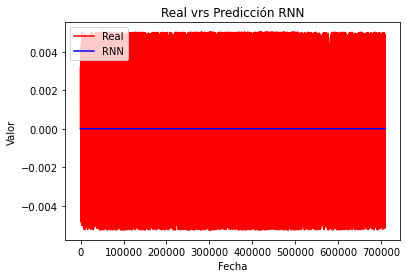

In [58]:
plt.plot(real_test_price, color="red", label="Real")
plt.plot(real_predicted_price, color="blue", label="RNN")
plt.title("Real vrs Predicción RNN")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.show()